# K-Means

## Fundamentos de la técnica

K-Means es un algoritmo de aprendizaje no supervisado que se utiliza principalmente para agrupamiento (clustering).  
Su objetivo es dividir un conjunto de datos en \( K \) grupos (o clusters) distintos, de manera que los elementos dentro de un mismo grupo sean similares entre sí, mientras que los de diferentes grupos sean lo más distintos posible.

A diferencia de los clasificadores supervisados como el Perceptrón o el kNN, K-Means no utiliza etiquetas de clase conocidas; en su lugar, identifica patrones o estructuras internas dentro de los datos.

El algoritmo sigue un proceso iterativo de asignación y actualización:
1. Se eligen \( K \) centroides iniciales (al azar o mediante un método como *k-means++*).  
2. Cada punto del conjunto se asigna al centroide más cercano según una métrica de distancia (generalmente euclidiana).  
3. Se recalculan los centroides como el promedio de los puntos asignados a cada grupo.  
4. El proceso se repite hasta que los centroides no cambian significativamente o se alcanza un número máximo de iteraciones.

---

## Modelo Matemático

Sea un conjunto de datos con \( n \) muestras \( X = \{x_1, x_2, \dots, x_n\} \), donde cada \( x_i \in \mathbb{R}^m \) es un vector de \( m \) características.

El objetivo del algoritmo K-Means es encontrar \( K \) centroides \( \mu_1, \mu_2, \dots, \mu_K \) que minimicen la **suma total de distancias cuadráticas** entre cada punto y su centroide correspondiente:

$$
J = \sum_{i=1}^{K} \sum_{x_j \in C_i} \|x_j - \mu_i\|^2
$$

donde:
- $C_i$ representa el conjunto de puntos asignados al cluster $i$, es decir $C_i = \{ x_j \mid x_j \in C_i \}$.
- $\mu_i$ es el centroide del cluster $i$, definido como $\displaystyle \mu_i = \frac{1}{|C_i|}\sum_{x_j \in C_i} x_j$.
- $\|x_j - \mu_i\|^2$ es la distancia euclidiana al cuadrado entre el punto $x_j$ y el centroide $\mu_i$, que puede expresarse como $(x_j - \mu_i)^\top (x_j - \mu_i)$.

El algoritmo busca minimizar la función de costo \( J \) mediante dos pasos iterativos:
1. **Asignación:**  
   Cada punto \( x_j \) se asigna al cluster más cercano:  
   $$
   C_i = \{ x_j : \|x_j - \mu_i\|^2 \leq \|x_j - \mu_l\|^2, \forall l = 1, 2, \dots, K \}
   $$
2. **Actualización:**  
   Los centroides se recalculan como el promedio de los puntos asignados:  
   $$
   \mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j
   $$

## Descripción de la librería: **Scikit-learn**

**Scikit-learn** proporciona una implementación del algoritmo K-Means a través de la clase `KMeans`, incluida en el módulo `sklearn.cluster`.

## Clase

Esta clase permite ajustar un modelo de agrupamiento especificando:
- `n_clusters`: número de grupos \( K \),
- `init`: método de inicialización de centroides (por defecto `k-means++`),
- `max_iter`: número máximo de iteraciones,
- `random_state`: semilla para reproducibilidad.

## Funciones

Funciones principales:
- `.fit(X)`: entrena el modelo encontrando los centroides.
- `.predict(X)`: asigna a cada muestra el cluster más cercano.
- `.fit_predict(X)`: combina ambos pasos (entrenamiento + asignación).
- `.cluster_centers_`: devuelve las coordenadas de los centroides finales.
- `.inertia_`: devuelve el valor final de la función de costo \( J \).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

## Pipeline del modelo

### Preprocesamiento

Se realizara:
- Un análisis estadístico previo de las características.
- Normalización de los datos.
- Reducción de dimensionalidad con PCA para visualización.
- Gráfico de dispersión (Scatter Plot) de las clases reales.

In [2]:
#Cargar el dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y_true = data.target

print("Dimensiones del dataset:", X.shape)
X.head()

Dimensiones del dataset: (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


,mean,std,min,max
alcohol,13.000618,0.811827,11.03,14.83
malic_acid,2.336348,1.117146,0.74,5.80
ash,2.366517,0.274344,1.36,3.23
alcalinity_of_ash,19.494944,3.339564,10.60,30.00
magnesium,99.741573,14.282484,70.00,162.00
total_phenols,2.295112,0.625851,0.98,3.88
flavanoids,2.029270,0.998859,0.34,5.08
nonflavanoid_phenols,0.361854,0.124453,0.13,0.66
proanthocyanins,1.590899,0.572359,0.41,3.58
color_intensity,5.058090,2.318286,1.28,13.00


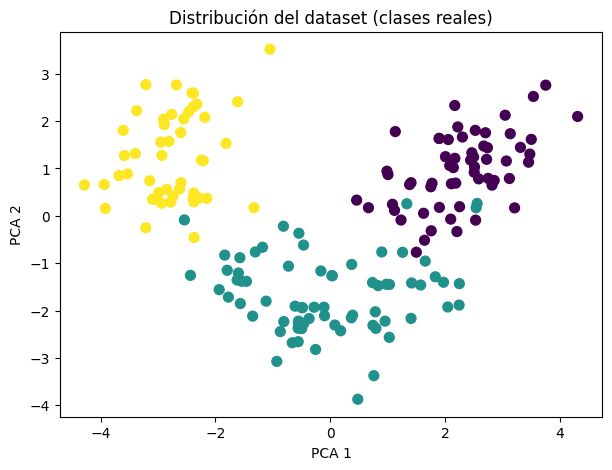

In [3]:
display(X.describe().T[['mean', 'std', 'min', 'max']])

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducción de dimensionalidad para graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Gráfico de dispersión según clases reales
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', s=50)
plt.title("Distribución del dataset (clases reales)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

### Entrenamiento del modelo

Se entrena el modelo K-Means con `k=3` (porque el dataset Wine tiene 3 clases) y se visualizan los clusters encontrados.

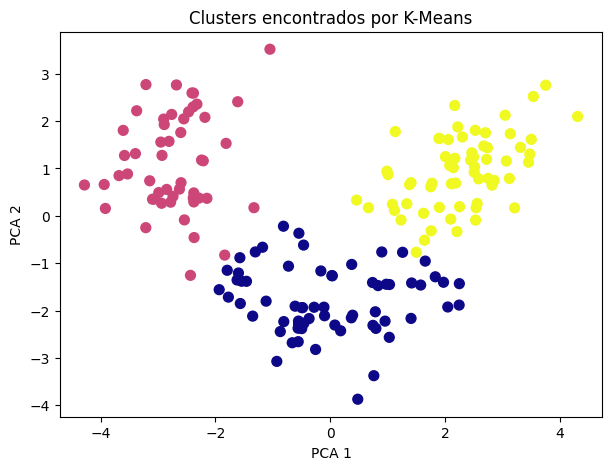

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Etiquetas asignadas por K-Means
y_pred = kmeans.labels_

# Visualización de clusters
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='plasma', s=50)
plt.title("Clusters encontrados por K-Means")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

## Prediccion

Se crea una función que reciba un nuevo patrón (vino) y devuelva el cluster al que pertenece.

In [5]:
def predecir_cluster(nuevo_patron):
    nuevo_patron = np.array(nuevo_patron).reshape(1, -1)
    nuevo_patron_scaled = scaler.transform(nuevo_patron)
    cluster = kmeans.predict(nuevo_patron_scaled)[0]
    print(f"El patrón fue clasificado en el cluster #{cluster}")
    return cluster

# Ejemplo con el primer vino del dataset
predecir_cluster(X.iloc[0])

El patrón fue clasificado en el cluster #2


C:\Users\ID858\OneDrive\Desktop\INNI\Tareas\7mo_semestre\Clasificacion_inteligente\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.int32(2)

## Evaluacion del modelo

Aunque K-Means es un algoritmo no supervisado, se pueden comparar los clusters obtenidos con las etiquetas reales para analizar su rendimiento mediante:

- **Matriz de confusión.**
- **Accuracy.**

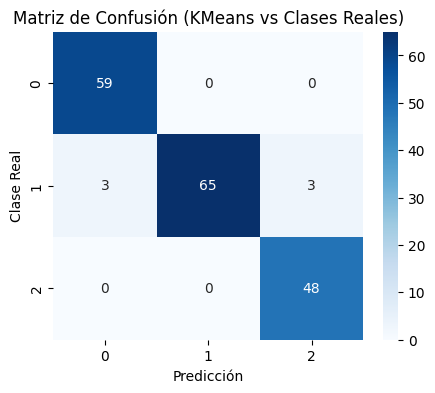

Exactitud (Accuracy): 0.966


In [6]:
def map_clusters_to_labels(y_true, y_pred):
    mapping = {}
    for cluster in np.unique(y_pred):
        mask = y_pred == cluster
        target_mode = pd.Series(y_true[mask]).mode()[0]
        mapping[cluster] = target_mode
    return np.array([mapping[cluster] for cluster in y_pred])

y_pred_mapped = map_clusters_to_labels(y_true, y_pred)

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_mapped)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión (KMeans vs Clases Reales)")
plt.xlabel("Predicción")
plt.ylabel("Clase Real")
plt.show()

# Accuracy
acc = accuracy_score(y_true, y_pred_mapped)
print(f"Exactitud (Accuracy): {acc:.3f}")

## Conclusiones

- El algoritmo K-Means permite identificar agrupaciones naturales en los datos sin necesidad de etiquetas.
- En el dataset de vinos, los clusters encontrados por K-Means se corresponden en gran medida con las tres clases reales.
- El accuracy obtenido es una medida de qué tan bien coincidieron los clusters con las clases reales, aunque no debe interpretarse igual que en un modelo supervisado.
- La elección adecuada de *k* y la normalización de los datos son factores clave para obtener buenos resultados.

## Referencias bibliograficas

https://medium.com/latinxinai/tutorial-del-algoritmo-k-means-en-python-d8055751e2f3

https://medium.com/ai-made-simple/k-means-clustering-e9bd722a09fa